In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
# reflect an existing database into a new model
# reflect the tables

base = automap_base()
base.prepare(engine, reflect = True)
measurement = base.classes.measurement
station = base.classes.station

sqlalchemy.ext.automap.station

In [16]:
# We can view all of the classes that automap found
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# We can view all of the classes that automap found
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

date = dt.datetime(2016, 8, 22)
results = session.query(measurement.date, measurement.prcp).filter(measurement.date > date).all()

#for record in results:
    #print(record)



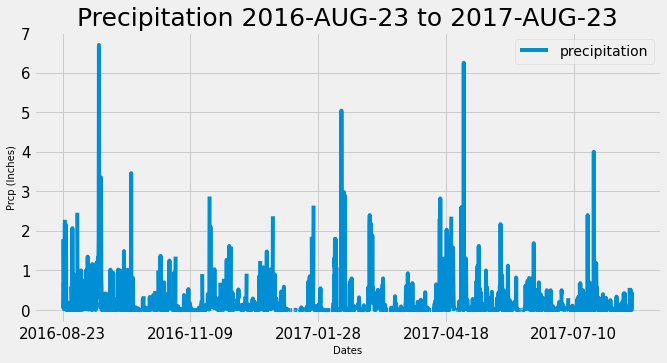

In [82]:
df = pd.DataFrame(results, columns = ['date', 'precipitation'])
df.set_index('date', inplace = True)
df = df.sort_index()

ax = df.plot(fontsize=15, figsize=(10,5));
ax.set_title("Precipitation 2016-AUG-23 to 2017-AUG-23", fontsize=25);
ax.set_ylabel('Prcp (Inches)', fontsize=10);
ax.set_xlabel('Dates', fontsize=10);
plt.show()


In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [94]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(station.station)).all()
stations

[(9)]

In [134]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).all()
active
ma= active[0][0]


In [136]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

lowest = session.query(func.min(measurement.tobs)).filter(measurement.station == ma).all()
highest = session.query(func.max(measurement.tobs)).filter(measurement.station == ma).all()
avg = session.query(func.avg(measurement.tobs)).filter(measurement.station == ma).all()

print(lowest)
print(highest)
print(avg)


[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 54., 32.,  9.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

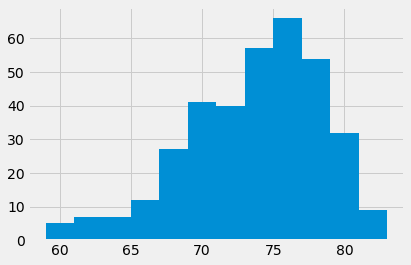

In [138]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last = session.query(measurement.date).\
                filter(measurement.station == active[0][0]).\
                order_by(measurement.date.desc()).first()


last12 = (dt.datetime.strptime(last[0],'%Y-%m-%d') - dt.timedelta(days = 365)).strftime('%Y-%m-%d')


active12 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == active[0][0]).\
    filter(measurement.date >= last12).all()

df = pd.DataFrame(active12, columns = ['date', 'temperature'])


fig, axs = plt.subplots(1, sharey=True)
axs.hist(df['temperature'], bins=12)



## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
